# Importing libraries


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

## Loading Dataset

In [21]:
df = pd.read_csv("Unemployment in India.csv")

In [22]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Region                                 740 non-null    object 
 1    Date                                  740 non-null    object 
 2    Frequency                             740 non-null    object 
 3   Estimated Unemployment Rate            740 non-null    float64
 4   Estimated Employed                     740 non-null    float64
 5    Estimated Labour Participation Rate   740 non-null    float64
 6   Area                                   740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 41.4+ KB


In [24]:
print(df.shape)
print(df.size)

(754, 7)
5278


In [25]:
df.describe()

,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [26]:
df.isnull().sum()

Region                                   14
 Date                                    14
 Frequency                               14
Estimated Unemployment Rate              14
Estimated Employed                       14
 Estimated Labour Participation Rate     14
Area                                     14
dtype: int64

In [27]:
df=df.dropna()

In [28]:
df = df.drop_duplicates()

In [29]:
df

,Region,Date,Frequency,Estimated Unemployment Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban


In [30]:
df.columns

Index(['Region', ' Date', ' Frequency', 'Estimated Unemployment Rate',
       'Estimated Employed', ' Estimated Labour Participation Rate ', 'Area'],
      dtype='object')

In [31]:
df.columns = df.columns.str.strip()

In [32]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

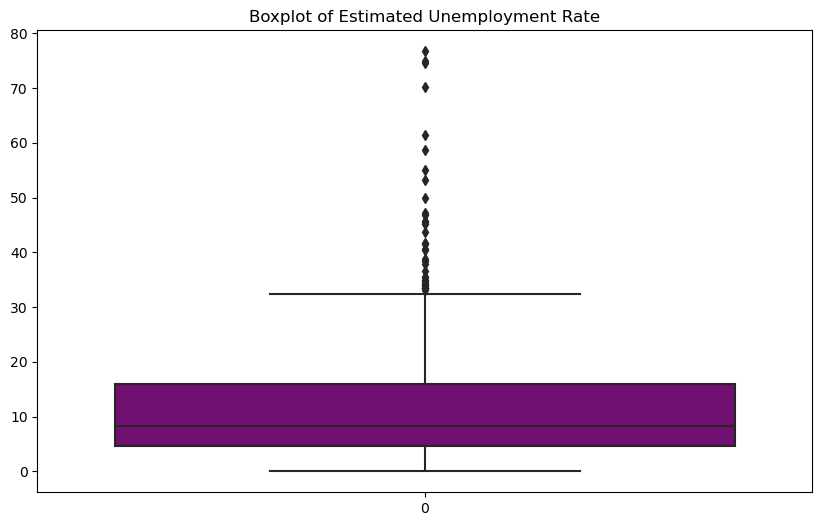

In [33]:
# Set the color palette to purple
sns.set_palette('Purples')

# Visualize the distribution of 'Estimated Unemployment Rate'
plt.figure(figsize=(10, 6))
sns.boxplot(df['Estimated Unemployment Rate'], color='purple')
plt.title('Boxplot of Estimated Unemployment Rate')
plt.show()


#### Outlier Treatment

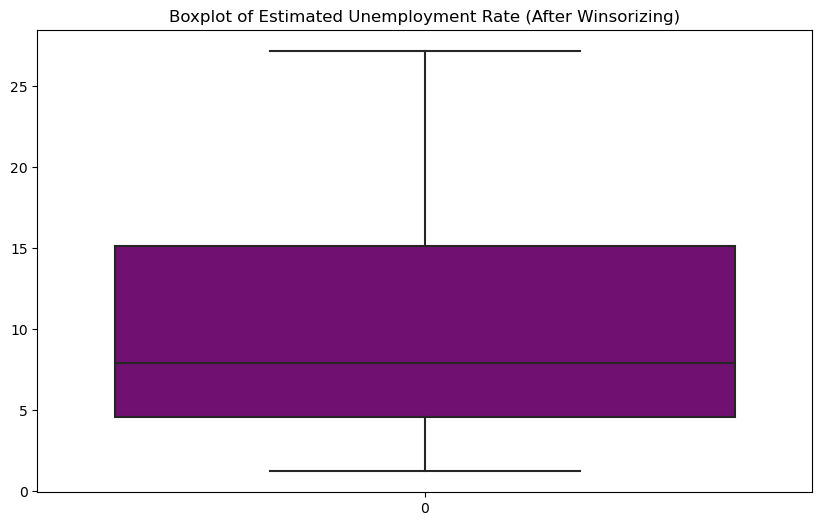

In [42]:
from scipy.stats.mstats import winsorize

# Set the color palette to purple
sns.set_palette('Purples')


# Winsorize the data to cap extreme values using .loc to avoid SettingWithCopyWarning
df.loc[:, 'Estimated Unemployment Rate'] = winsorize(df['Estimated Unemployment Rate'], limits=[0.05, 0.05])
df.loc[:, 'Estimated Employed'] = winsorize(df['Estimated Employed'], limits=[0.05, 0.05])
df.loc[:, 'Estimated Labour Participation Rate'] = winsorize(df['Estimated Labour Participation Rate'], limits=[0.05, 0.05])


# Visualize the distribution of 'Estimated Unemployment Rate' after Winsorizing
plt.figure(figsize=(10, 6))
sns.boxplot(df['Estimated Unemployment Rate'], color='purple')
plt.title('Boxplot of Estimated Unemployment Rate (After Winsorizing)')
plt.show()

#### Data Visualization

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


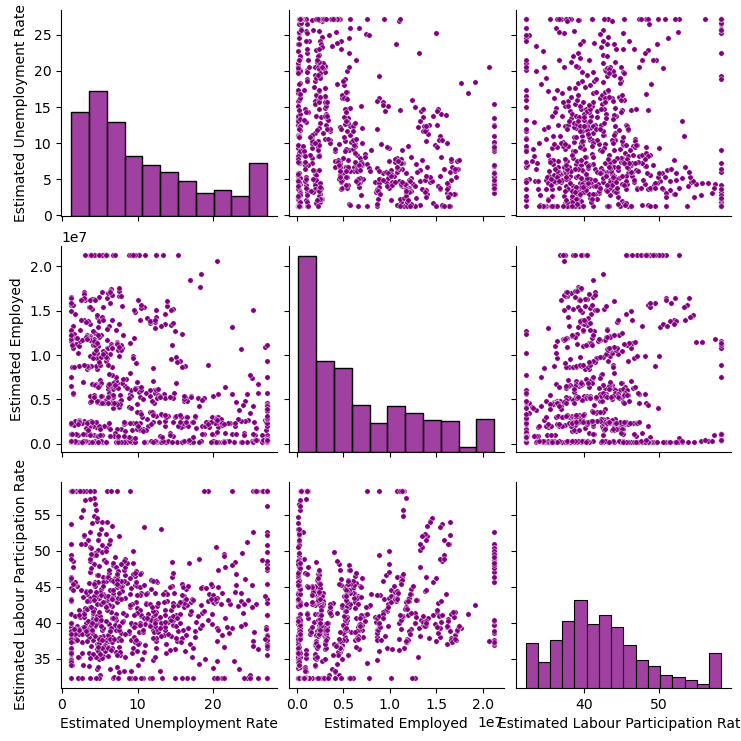

In [44]:
# Pairplot for multivariate analysis
sns.pairplot(df[['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate']],
             plot_kws={'color': 'purple', 's': 15}, diag_kws={'color': 'purple'})
plt.show()

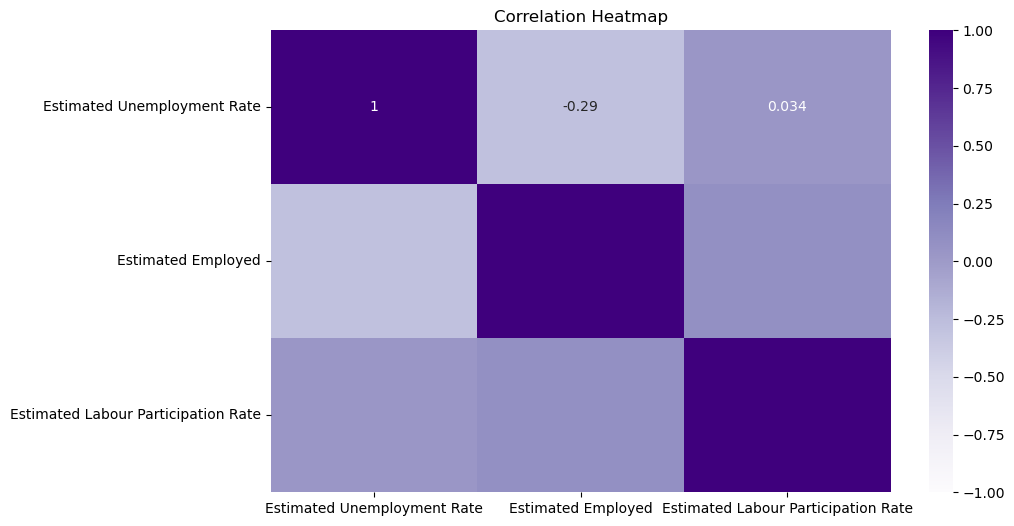

In [46]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Purples', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

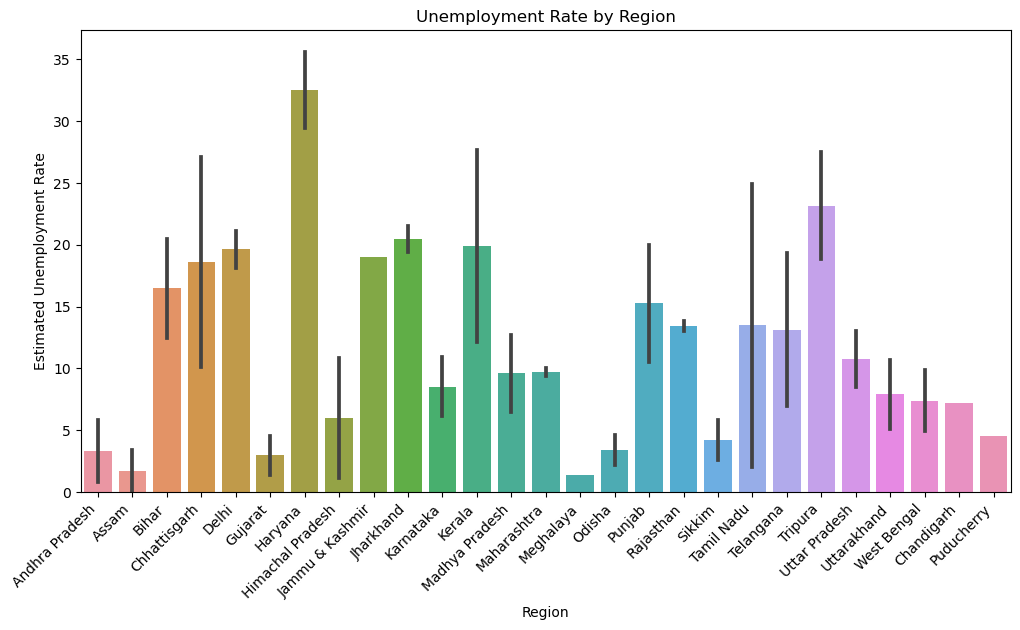

In [35]:
df_latest = df[df['Date'] == df['Date'].max()]

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_latest, x='Region', y='Estimated Unemployment Rate')
plt.xlabel('Region')
plt.ylabel('Estimated Unemployment Rate')
plt.title('Unemployment Rate by Region')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

#### Line plot to show average unemployment rate 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


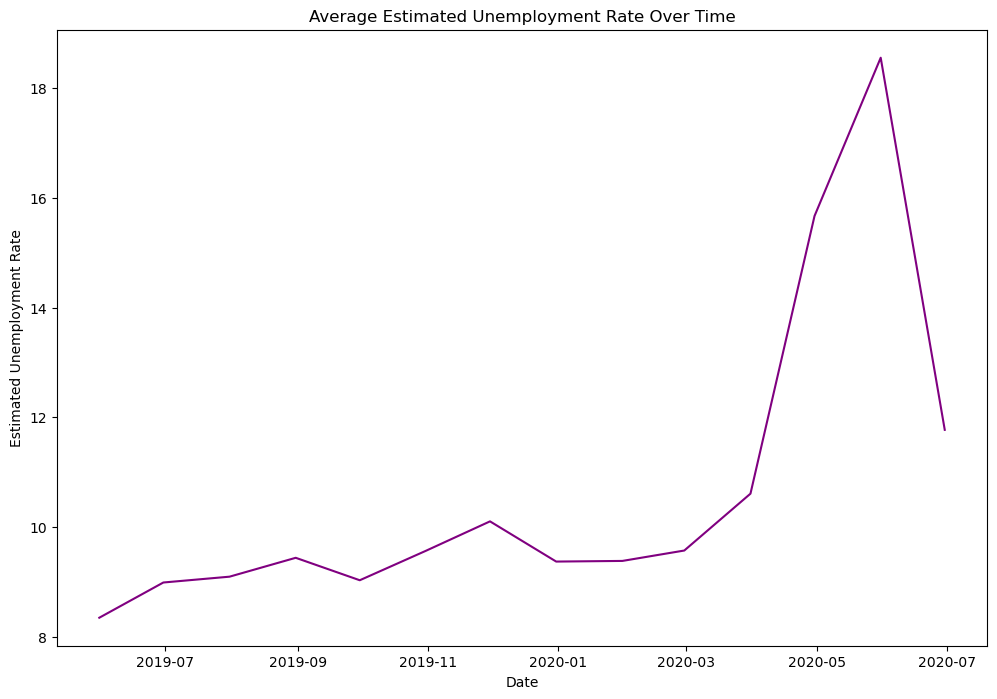

In [51]:
# Calculate the average unemployment rate over time
average_unemployment = df.groupby('Date')['Estimated Unemployment Rate'].mean().reset_index()

# Plot the average unemployment rate over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=average_unemployment, x='Date', y='Estimated Unemployment Rate', color='purple')
plt.title('Average Estimated Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Estimated Unemployment Rate')
plt.show()

## Results : 

In [57]:
numeric_df = df.select_dtypes(include=[np.number])

avg_unemployment_rate = numeric_df['Estimated Unemployment Rate'].mean()
print(f'Average Estimated Unemployment Rate: {avg_unemployment_rate:.2f}%')

highest_unemployment = df[df['Estimated Unemployment Rate'] == df['Estimated Unemployment Rate'].max()]['Region'].values[0]
lowest_unemployment = df[df['Estimated Unemployment Rate'] == df['Estimated Unemployment Rate'].min()]['Region'].values[0]
print(f'Region with highest unemployment rate: {highest_unemployment}')
print(f'Region with lowest unemployment rate: {lowest_unemployment}')

Average Estimated Unemployment Rate: 10.51%
Region with highest unemployment rate: Haryana
Region with lowest unemployment rate: Andhra Pradesh
